## Occurrence Data for M. micrantha(from www.gbif.org)

Import libraries

In [1]:
#Required packages
import rpy2.robjects as ro
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from fiona.crs import from_epsg
from shapely.ops import cascaded_union

<p style='text-align: justify;'>The occurrence data would be downloaded from the Global Biodiversity Information Facility (www.gbif.org). We basically require the longitude and latitudue of the locations where the plant was found. R provides inbuilt functions that allows the user to access the database and extract the information. We extracted data by calling R package using library <code>rpy2</code>within the Python environment. </p>

<p style='text-align: justify;'>The module <code>robjects</code> of library <code>rpy2</code> help us to use the same code as we use in R language inside the <code> ro.r(' ')</code>. For data processing we need to install two packages from R, namely, <i>dismo</i> and <i>jsonlite</i>. We need <i>jsonlite</i> because data contains geographical coordinates. It does mapping between the R objects and JSON data.</p>

In [2]:
ro.r('install.packages("dismo",dependencies = TRUE)')
ro.r('install.packages("jsonlite", dependencies = TRUE)')

In [3]:
library = ro.r('library(dismo)') 

In [4]:
downld_data = ro.r('mic_gbif_all = gbif(genus = "Mikania", geo = FALSE)') # Extracting Species with genus name Mikania

In [5]:
Na_removd =ro.r('mic_gbif_all = subset(mic_gbif_all, !is.na(lon) & !is.na(lat) & !is.na(species))')# Removing the 
#missing rows for longitude , latitude

In [6]:
var_name =ro.r('names(mic_gbif_all)') # variable names

In [7]:
mic_gbif =ro.r('mic_gbif_all = mic_gbif_all[,c(" species "," lon "," lat ")] ')# Data contains only name , lon and lat

In [8]:
mic_gbif.to_csv(r"C:\Users\Jyoti\file name\mikania_1.csv", header = True) # saving data into csv file.

In [9]:
mic_gbif = pd.read_csv('mikania_1.csv') # read csv file

In [10]:
unique_species=np.unique(mic_gbif.species) # array of unique name of species
unique_species[:10] # first 10 name of species in the array.

array(['Kanimia strobiliferaa', 'Mikania acuminata', 'Mikania acutissima',
       'Mikania additicia', 'Mikania alba', 'Mikania allartii',
       'Mikania alvimii', 'Mikania amblyolepis', 'Mikania amorimii',
       'Mikania andrei'], dtype=object)

In [11]:
unique = mic_gbif.nunique() # show total no.of unique species names
unique [1]

426

In [12]:
mic_gbif = mic_gbif.loc[mic_gbif['species']=="Mikania micrantha"] # subset of species

In [13]:
np.unique(mic_gbif.species) # checking the species extracted are correct .

array(['Mikania micrantha'], dtype=object)

In [14]:
mic_gbif.head () # gives first five row

,Unnamed: 0,species,lon,lat
1,2,Mikania micrantha,111.835979,2.290731
3,4,Mikania micrantha,57.431867,-20.208804
26,27,Mikania micrantha,103.867744,1.355379
70,71,Mikania micrantha,120.483833,23.471520
74,75,Mikania micrantha,120.519792,22.663100


In [15]:
mic_gbif.lon.values

array([111.835979,  57.431867, 103.867744, ..., -57.1     , -53.88    ,
       -56.73    ])

#### Converting Dataframe into a geological dataframe.

In [16]:
geometry =[Point(xy) for xy in zip(mic_gbif.lon.values,mic_gbif.lat.values)]
crs = {'init':'epsg :4326'}
gdf = gpd.GeoDataFrame(mic_gbif, crs=crs, geometry = geometry)
gdf.head()

,Unnamed: 0,species,lon,lat,geometry
1,2,Mikania micrantha,111.835979,2.290731,POINT (111.835979 2.290731)
3,4,Mikania micrantha,57.431867,-20.208804,POINT (57.431867 -20.208804)
26,27,Mikania micrantha,103.867744,1.355379,POINT (103.867744 1.355379)
70,71,Mikania micrantha,120.483833,23.471520,POINT (120.483833 23.47152)
74,75,Mikania micrantha,120.519792,22.663100,POINT (120.519792 22.6631)


World map data has been retrived from the site - https://github.com/nasa/World-Wind-Java. Data is in the shape file with extension <i>.shp</i>. The shape file contains a column of geometry as polygons, area of regions and so on.

In [17]:
wrld_simpl = gpd.read_file('TM_WORLD_BORDERS_SIMPL-0.2.shp')
wrld_simpl.crs # gives coordinate reference system of data

{'init': 'epsg:4326'}

Since the shapefile contains geometry. We can visualize the data on the world map.

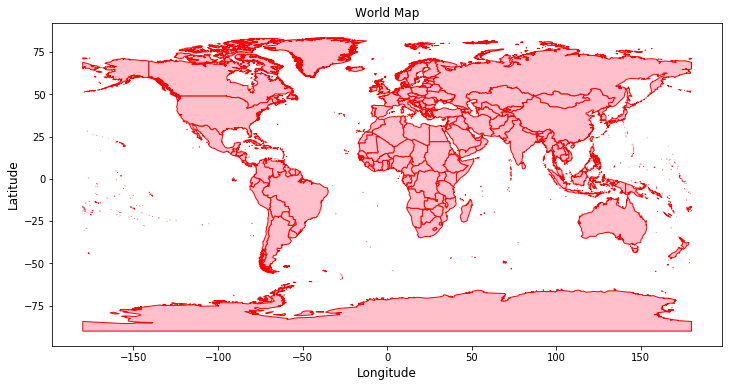

In [18]:
wrld_simpl.plot(figsize=(12,8), edgecolor ='red', color='pink')
plt.title('World Map', fontsize =12)
plt.xlabel('Longitude', size =12)
plt.ylabel('Latitude', size =12)
plt.savefig('world map')

In the above plot, edges of polygons are in red color and region inside the edges are in pink color while white region signifies the ocean in the world map.

<p style='text-align: justify;'>And our focus is only the certain region not the entire world. The regions are a continent SouthAmerica and a country India. With the view on the map you can observe the extent values of longitude and latitude of SouthAmerica and India. In next code, I have displayed the SouthAmerica region just with the view on axis of previous map and highlighting the region with transparent blue square box.</p>

<p style='text-align: justify;'>In the following, we represent the regions by transparent square. They are nothing but the approximate extent of SouthAmerica and India. The extent has been created here with visual inspection by looking into the world map. However, extent can be extracted from the data points of occurrence species located in SouthAmercia. Extent of regions will be extracted in further code with the explanations.</p>

Text(75.875, 0.5, 'Latitude')

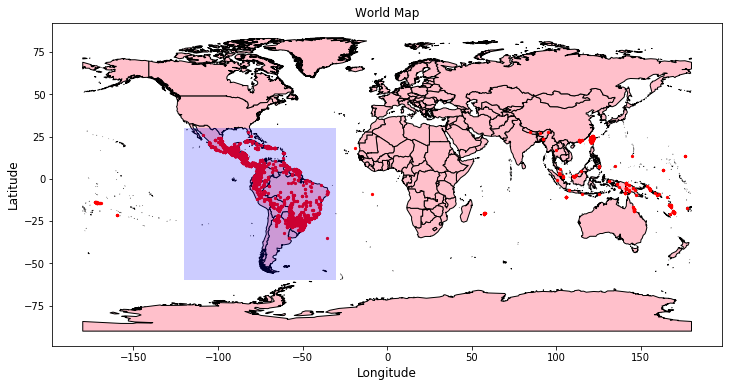

In [19]:
polys1 = gpd.GeoSeries([Polygon([(-120,-60),(-120,30),(-30,30),(-30,-60)])])
# creating transparent square box for representing SouthAmerica in world map.
base = wrld_simpl.plot(edgecolor ='black',color='pink', figsize =(12,8))
gdf.plot (ax=base , marker ='o', color ='red', markersize =5)
polys1.plot (ax=base , color ='blue', alpha =0.2)
plt.title('World Map', fontsize =12)
plt.xlabel('Longitude', size =12)
plt.ylabel('Latitude', size =12)

#### Extracting datasets of continent South America

Occurrences from SouthAmerica have been extracted using the approximated extent values with visual inspection of the region SouthAmerica.

In [20]:
mic_gbif_america=gdf[(gdf.lon<-34)&(gdf.lon>-130)]
mic_gbif_america.head() # subset data of South America

,Unnamed: 0,species,lon,lat,geometry
157,158,Mikania micrantha,-40.609514,-19.990989,POINT (-40.609514 -19.990989)
414,415,Mikania micrantha,-99.995244,21.904365,POINT (-99.995244 21.904365)
460,461,Mikania micrantha,-52.485556,-30.324722,POINT (-52.485556 -30.324722)
484,485,Mikania micrantha,-53.030722,-24.068778,POINT (-53.030722 -24.068778)
500,501,Mikania micrantha,-48.239353,-2.672933,POINT (-48.239353 -2.672933)


Text(48.875, 0.5, 'Latitude')

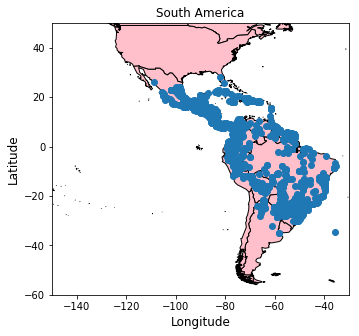

In [21]:
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
mic_gbif_america.plot(ax=base)
base.set_xlim(-150,-30)
base.set_ylim(-60,50)
plt.title('South America',fontsize =12)
plt.xlabel('Longitude',size =12)
plt.ylabel('Latitude',size =12)


The extracted data is saved into shape file by specifying the crs(coordinate reference system) to the geological dataframe for the future use.

In [22]:
mic_gbif_america.crs = from_epsg(4326) 
mic_gbif_america.crs # displays coordinate reference system

{'init': 'epsg:4326', 'no_defs': True}

In [23]:
outfp=r"C:\Users\Prajapati Vivek\Desktop\spatial project\mikania\html file\mic_gbif_america.shp"
mic_gbif_america.to_file(outfp)

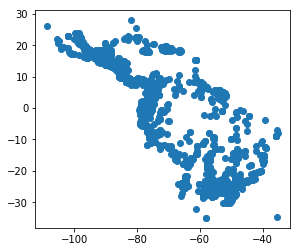

In [24]:
mic_gbif_america=gpd.read_file('mic_gbif_america.shp')
mic_gbif_america.plot()

#### Same way we go for India

Text(48.875, 0.5, 'Latitude')

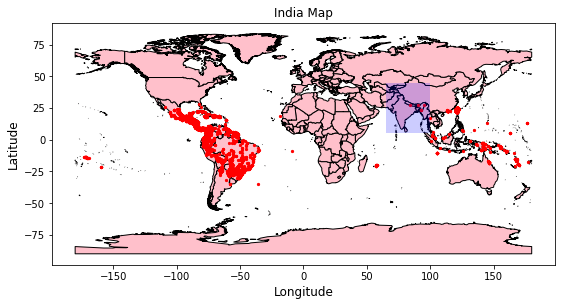

In [25]:
polys2 = gpd.GeoSeries([Polygon([(65,5),(65,45),(100,45),(100,5)])])
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
gdf.plot(ax=base, marker='o', color='red', markersize=5)
polys2.plot(ax=base, color='blue', alpha=0.2)
plt.title('India Map', fontsize =12)
plt.xlabel('Longitude', size =12)
plt.ylabel('Latitude', size =12)

In [26]:
mic_gbif_India=gdf[(gdf.lon<96) & (gdf.lon>58)]
mic_gbif_India.head() # subset data of India

,Unnamed: 0,species,lon,lat,geometry
492,493,Mikania micrantha,90.532148,27.189478,POINT (90.53214799999999 27.189478)
1089,1090,Mikania micrantha,92.390000,23.440000,POINT (92.39 23.44)
1339,1340,Mikania micrantha,92.390000,23.440000,POINT (92.39 23.44)
1342,1343,Mikania micrantha,92.390000,23.440000,POINT (92.39 23.44)
6677,6678,Mikania micrantha,84.350833,27.550556,POINT (84.35083299999999 27.550556)


In [27]:
mic_gbif_India.shape # dimension

(6, 5)

Text(48.875, 0.5, 'Latitude')

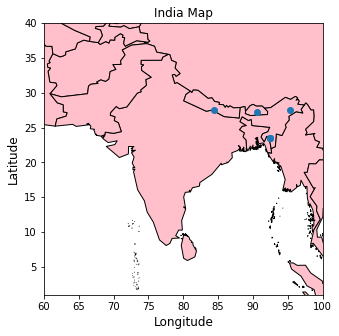

In [28]:
base=wrld_simpl.plot(color='pink', edgecolor='black', figsize=(9,5))
mic_gbif_India.plot(ax=base)
base.set_xlim(60,100)
base.set_ylim(1,40)
plt.title('India Map', fontsize =12)
plt.xlabel('Longitude', size =12)
plt.ylabel('Latitude', size =12)

In [29]:
mic_gbif_India.crs = wrld_simpl.crs
mic_gbif_India.crs

{'init': 'epsg:4326'}

In [30]:
outfp=r"C:\Users\Prajapati Vivek\Desktop\spatial project\mikania\html file\mic_gbif_India.shp"
mic_gbif_India.to_file(outfp)

### Extent using inbuilt functions

<p style='text-align: justify;'>We can extract extent based on polygons or points as geometry. Each point in column <code>geometry</code> has their own extent. Similarly, each polygon in column <code>geometry</code> has thier own extent. But SouthAmerica is continent, it contains 37 countries in it. That means individual polygons as geometry contained in the <i>TM_WORLD_BORDERS_SIMPL-0.2.shp</i> shapefile represent each polygons of the country present in the World map respectively. And Points as geoemtry contained in <code>GeoDataFrame</code> with name <code>mic_gbif_america</code>.</p>

<p style='text-align: justify;'>In the following code, we extract the extent from individual Points of occurrence species, extent from Polygons of countries in world map and extent from Polygon of SouthAmerica.</p>

#### Extent from Points of occurrence species

In the following code, extent of all points as geometry has been extracted using the attribute <code>.bounds</code>. You can see below in the table, each point is represented with its extent. 

In [31]:
Extent_points = mic_gbif_america['geometry'].bounds
Extent_points[:10]# first 10 rows 

,minx,miny,maxx,maxy
0,-40.609514,-19.990989,-40.609514,-19.990989
1,-99.995244,21.904365,-99.995244,21.904365
2,-52.485556,-30.324722,-52.485556,-30.324722
3,-53.030722,-24.068778,-53.030722,-24.068778
4,-48.239353,-2.672933,-48.239353,-2.672933
5,-52.124278,-24.759639,-52.124278,-24.759639
6,-53.753694,-25.108444,-53.753694,-25.108444
7,-55.705278,-11.667778,-55.705278,-11.667778
8,-95.750455,18.593192,-95.750455,18.593192
9,-51.255000,-26.865000,-51.255000,-26.865000


#### Extent from Polygons of Country in World Map

Similarly, extent of all polygons as geoemtry has been extracted.

In [32]:
Extent_polygons = wrld_simpl['geometry'].bounds
Extent_polygons[:10] #first 10 rows

,minx,miny,maxx,maxy
0,-61.887222,17.024441,-61.686668,17.703888
1,-8.667223,18.976387,11.986475,37.086388
2,44.778864,38.442408,50.374994,41.897058
3,19.288609,39.691200,20.983490,42.618050
4,43.460772,38.841150,46.541384,41.297052
5,11.693609,-18.016392,24.020555,-4.388990
6,-170.826111,-14.325003,-169.444489,-14.167501
7,-73.583618,-55.051674,-53.807785,-21.780521
8,112.951105,-54.749725,159.101900,-10.051666
9,50.461662,25.595276,50.821388,26.288887


#### Extent from Continent SouthAmerica

<p style='text-align: justify;'>For Continent SouthAmerica, SouthAmerica contains 37 countries that means there are 37 polygons inside the boundary of SouthAmerica. We need to create single polygon by taking the union of all polygons inside the boundary of SouthAmerica. This is done with the method <code>cascaded_union</code>. The method will bring out the union of all countries reside inside the boundary of SouthAmerica. In this way polygon of SouthAmerica has been created. And with the attribute <code>.bounds</code>, extent of SouthAmerica is extracted.</p>

In [33]:
Extent_SouthAmerica = cascaded_union(mic_gbif_america['geometry']).bounds
Extent_SouthAmerica

(-108.766667, -34.99, -34.950278000000004, 28.0)

In [35]:
Extent_India = wrld_simpl[wrld_simpl['NAME']=='India']['geometry'].bounds
Extent_India

,minx,miny,maxx,maxy
82,68.197802,6.745554,97.348879,35.501329


####  Working On Duplicacy

In [36]:
## duplicated rows of lon-lat columns for South America
dups=mic_gbif_america.duplicated(subset=('lon','lat')) 

In [37]:
sum(dups) # total no. of duplicates

559

In [38]:
# dropping duplicated rows
mic_gbif_america=mic_gbif_america.drop_duplicates(subset=('lon','lat'),inplace=False)
mic_gbif_america.head()

,Unnamed_ 0,species,lon,lat,geometry
0,158,Mikania micrantha,-40.609514,-19.990989,POINT (-40.609514 -19.990989)
1,415,Mikania micrantha,-99.995244,21.904365,POINT (-99.995244 21.904365)
2,461,Mikania micrantha,-52.485556,-30.324722,POINT (-52.485556 -30.324722)
3,485,Mikania micrantha,-53.030722,-24.068778,POINT (-53.030722 -24.068778)
4,501,Mikania micrantha,-48.239353,-2.672933,POINT (-48.239353 -2.672933)


Why do we need to remove duplicated rows?